In [ ]:
import os
import sys
import io
import gzip
import zipfile
import requests
import pandas as pd
import matplotlib.pyplot as plt
import networkx as nx
import numpy as np
from scipy.io import mmread

def load_graph(name: str) -> nx.Graph:
    """„Éç„ÉÉ„Éà„ÉØ„Éº„ÇØ„Ç∞„É©„Éï„Çí„ÉÄ„Ç¶„É≥„É≠„Éº„Éâ„Åó„Å¶ÂàùÊúüÂåñ„Åô„ÇãÈñ¢Êï∞

    „Éë„É©„É°„Éº„Çø
    ----------
    name : str
        Ê¨°„ÅÆ„ÅÑ„Åö„Çå„Åã„ÇíÊåáÂÆö„Åô„Çã: ["cora",  "football", "arvix", "power-us-grid", "facebook", "wiki"]

    Êàª„ÇäÂÄ§
    -------
    nx.Graph

    ‰æãÂ§ñ
    ------
    ValueError
        ÊåáÂÆö„Åï„Çå„ÅüÂêçÂâç„Åå„Çµ„Éù„Éº„Éà„Åï„Çå„Å¶„ÅÑ„Å™„ÅÑÂ†¥Âêà
    """
    if name.lower() == "cora":
        # Cora „Éá„Éº„Çø„Çª„ÉÉ„ÉàÔºàGraphMLÂΩ¢ÂºèÔºâ„Çí„ÉÄ„Ç¶„É≥„É≠„Éº„Éâ„Åó„Å¶Ë™≠„ÅøËæº„ÇÄ
        download_url = "https://temprl.com/cora.graphml"
        res = requests.get(download_url)
        G = nx.read_graphml(io.BytesIO(res.content))
        G = nx.to_undirected(G)
        return G


    elif name.lower() == "football":
        # „Ç¢„É°„É™„Ç´„É≥„Éï„ÉÉ„Éà„Éú„Éº„É´„ÅÆ„Éç„ÉÉ„Éà„ÉØ„Éº„ÇØ„Éá„Éº„Çø„ÇíË™≠„ÅøËæº„ÇÄ
        download_url = "http://www-personal.umich.edu/~mejn/netdata/football.zip"

        res = requests.get(download_url)
        s = io.BytesIO(res.content)

        zf = zipfile.ZipFile(s)
        txt = zf.read("football.txt").decode()
        gml = zf.read("football.gml").decode()
        gml = gml.split("\n")[1:]  # „Ç≥„É°„É≥„ÉàË°å„ÇíÈô§Âéª
        G_football = nx.parse_gml(gml)
        G_football = nx.relabel_nodes(
            G_football,
            {k: v for k, v in zip(G_football.nodes, range(len(G_football.nodes)))},
        )
        return G_football

    elif name.lower() == "power-us-grid":
        # „Ç¢„É°„É™„Ç´„ÅÆÈõªÂäõÁ∂≤„Éç„ÉÉ„Éà„ÉØ„Éº„ÇØ„ÇíË™≠„ÅøËæº„ÇÄÔºàÁñéË°åÂàóÂΩ¢ÂºèÔºâ
        download_url = "https://nrvis.com/download/data/power/power-US-Grid.zip"
        res = requests.get(download_url)
        zf = zipfile.ZipFile(io.BytesIO(res.content))
        G = nx.from_scipy_sparse_array(mmread(zf.open("power-US-Grid.mtx")))
        node_map = {u: int(u) for u in G.nodes}
        G = nx.relabel_nodes(G, node_map, copy=True)
        return G

    elif name.lower() in ["wiki", "arvix", "facebook"]:
        # SNAP„Éá„Éº„Çø„Çª„ÉÉ„ÉàÔºàGZIPÂΩ¢ÂºèÔºâ„ÇíË™≠„ÅøËæº„ÇÄ
        if name.lower() == "wiki":
            download_url = "https://snap.stanford.edu/data/wiki-Vote.txt.gz"
        elif name.lower() == "arvix":
            download_url = "https://snap.stanford.edu/data/ca-GrQc.txt.gz"
        elif name.lower() == "facebook":
            download_url = "https://snap.stanford.edu/data/facebook_combined.txt.gz"

        res = requests.get(download_url)
        with gzip.open(io.BytesIO(res.content), "rb") as f:
            G = nx.read_edgelist(f)
        return G

    else:
        raise ValueError("ÊåáÂÆö„Åï„Çå„Åü„Ç∞„É©„Éï„ÅØË¶ã„Å§„Åã„Çä„Åæ„Åõ„Çì")


# „Éç„ÉÉ„Éà„ÉØ„Éº„ÇØ

 $G = (V,E)$  
 $V$ = graph components: nodes, vertices $u \in V$  
 $E$ = graph interactions: links, edges

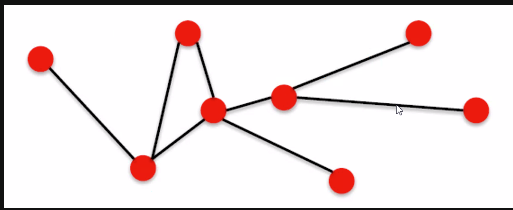


In [15]:
# Download and load graphs.
G_pgrid = load_graph("power-us-grid")
G_arvix = load_graph("arvix")
G_fb = load_graph("facebook")
G_wiki = load_graph("wiki")
G_cora = load_graph("cora")

In [21]:
print("power grid: ", G_pgrid)
print("Arvix collaboration network: ", G_arvix)
print("Facebook: ", G_fb)
print("Wiki Vote: ", G_wiki)
print("Cora: ", G_cora)

power grid:  Graph with 4941 nodes and 6594 edges
Arvix collaboration network:  Graph with 5242 nodes and 14496 edges
Facebook:  Graph with 4039 nodes and 88234 edges
Wiki Vote:  Graph with 7115 nodes and 100762 edges
Cora:  Graph with 2485 nodes and 5069 edges


# ÂØÜÂ∫¶„Å®„Çπ„Éë„Éº„ÇπÊÄß

## ÊúÄÂ§ß„Ç®„ÉÉ„Ç∏Êï∞

„Éç„ÉÉ„Éà„ÉØ„Éº„ÇØ„ÅÆ„É™„É≥„ÇØÊï∞„ÅÆ‰∏äÈôê„ÅØ„ÄÅ„Éç„ÉÉ„Éà„ÉØ„Éº„ÇØÂÜÖ„ÅÆ„Éé„Éº„ÉâÈñì„ÅßÂèØËÉΩ„Å™ÂÄã„ÄÖ„ÅÆÁπã„Åå„Çä„ÅÆÊï∞„Å´„Çà„Å£„Å¶Âà∂Èôê„Åï„Çå„Çã„ÄÇÂæì„Å£„Å¶„ÄÅ„É™„É≥„ÇØ„ÅÆÊúÄÂ§ßÊï∞„ÅØ„Éé„Éº„Éâ„ÅÆ„Éö„Ç¢Êï∞„ÅßÊ±∫„Åæ„Çã„ÄÇ

„Éé„Éº„ÉâÊï∞ $N$ „ÅÆ**ÁÑ°Âêë„Éç„ÉÉ„Éà„ÉØ„Éº„ÇØ**„Å´„Åä„ÅÑ„Å¶„ÄÅÂèØËÉΩ„Å™„Ç®„ÉÉ„Ç∏Ôºà„É™„É≥„ÇØÔºâ„ÅÆÊúÄÂ§ßÊï∞„ÅØÊ¨°„ÅÆÂºè„Åß‰∏é„Åà„Çâ„Çå„Åæ„ÅôÔºö

$$
E_{\text{max}} = \dfrac{N(N-1)}{2}
$$

Áõ¥ÊÑüÁöÑ„Å´„ÅØ„ÄÅÂêÑ„Éé„Éº„Éâ„ÅØ‰ªñ„ÅÆ$N-1$ÂÄã„ÅÆ„Éé„Éº„Éâ„Å®Êé•Á∂ö„Åô„Çã„Åì„Å®„Åå„Åß„Åç„ÄÅ„Åù„ÅÆÊï∞„ÅØ$N$ÂÄã„Åß„ÅÇ„Çã„ÄÇ„Åó„Åã„Åó„Åù„ÅÆÂ†¥Âêà„ÄÅÂêÑ„Éö„Ç¢„Çí‰∫åÈáç„Å´Êï∞„Åà„Å¶„ÅÑ„Çã„Åì„Å®„Å´„Å™„Çã„ÅÆ„Åß„ÄÅ2„ÅßÂâ≤„Çã„ÄÇ

„Éç„ÉÉ„Éà„ÉØ„Éº„ÇØÂÜÖ„ÅÆ„Åô„Åπ„Å¶„ÅÆ„Éé„Éº„Éâ„Åå‰∫í„ÅÑ„Å´Áõ¥Êé•„É™„É≥„ÇØ„Åó„Å¶„ÅÑ„Çã„Éç„ÉÉ„Éà„ÉØ„Éº„ÇØ„ÅØÂÆåÂÖ®„Éç„ÉÉ„Éà„ÉØ„Éº„ÇØÔºàComplete NetworkÔºâ„ÅßÂëº„Å∂„ÄÇ

True


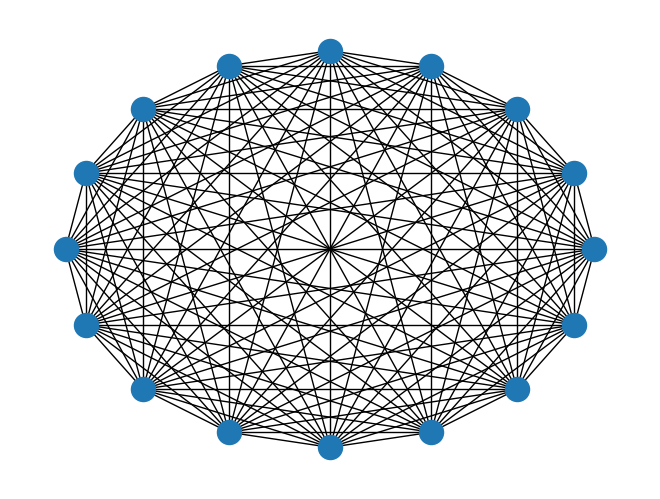

In [69]:
G = nx.complete_graph(n=16)
nx.draw_circular(G)

print(len(G.edges) == len(G.nodes) * (len(G.nodes) - 1) / 2)

## ÂØÜÂ∫¶

**„Éç„ÉÉ„Éà„ÉØ„Éº„ÇØ„ÅÆÂØÜÂ∫¶**„Å®„ÅØ„ÄÅ„Éç„ÉÉ„Éà„ÉØ„Éº„ÇØ„Å´„Åä„ÅÑ„Å¶„ÄÅÂÆüÈöõ„Å´Â≠òÂú®„Åô„Çã„Ç®„ÉÉ„Ç∏„ÅÆÊï∞„Åå„ÄÅÁêÜË´ñ‰∏äÂèØËÉΩ„Å™ÊúÄÂ§ßÊï∞„ÅÆ„Ç®„ÉÉ„Ç∏„Å´ÂØæ„Åó„Å¶„Å©„Çå„Å†„Åë„ÅÆÂâ≤Âêà„ÇíÂç†„ÇÅ„Å¶„ÅÑ„Çã„Åã„ÇíË°®„ÅôÊåáÊ®ô„Åß„Åô„ÄÇ

ÂÆåÂÖ®„Éç„ÉÉ„Éà„ÉØ„Éº„ÇØ„ÅÆÂØÜÂ∫¶„ÅØÊúÄÂ§ßÂÄ§„ÅÆ1„Å´„Å™„Çã„ÄÇ„Åó„Åã„Åó„Å™„Åå„Çâ„ÄÅÁèæÂÆü‰∏ñÁïå„ÅÆ„Éç„ÉÉ„Éà„ÉØ„Éº„ÇØ„Åß„ÅØ„ÄÅ„Åª„Å®„Çì„Å©„ÅÆ„Éé„Éº„Éâ„ÅÆ„Éö„Ç¢„ÅØ‰∫í„ÅÑ„Å´Áõ¥Êé•Êé•Á∂ö„Åï„Çå„Å¶„ÅÑ„Å™„ÅÑ„Åü„ÇÅ„ÄÅÂÆüÈöõ„ÅÆ„É™„É≥„ÇØÊï∞„ÅØÊúÄÂ§ßÊï∞„Çà„Çä„ÅØ„Çã„Åã„Å´
Â∞è„Åï„ÅÑ„ÅÆ„Åå‰∏ÄËà¨„Åß„Åô„ÄÇ

Âæì„Å£„Å¶„ÄÅÁèæÂÆü‰∏ñÁïå„ÅÆÂ§ßË¶èÊ®°„Å™„Éç„ÉÉ„Éà„ÉØ„Éº„ÇØ„Åß„ÅØ„ÄÅÂØÜÂ∫¶„ÅØ1„Çà„ÇäÂ∞è„Åï„ÅÑ„Åì„Å®„ÅåÂ§ö„ÅÑ„ÄÇ„Åì„Çå„ÅØ„Éç„ÉÉ„Éà„ÉØ„Éº„ÇØÊßãÈÄ†„ÇíÊâ±„ÅÜ‰∏ä„ÅßÈáçË¶Å„Å™ÁâπÂæ¥„Åß„ÅÇ„Çã„Çπ„Éë„Éº„ÇπÊÄß(sparsity)„Å®Âëº„Å∞„Çå„Å¶„ÅÑ„Çã„ÄÇ

---

„Éé„Éº„ÉâÊï∞„Çí $N$„ÄÅÂÆüÈöõ„ÅÆ„Ç®„ÉÉ„Ç∏Êï∞„Çí $E$ „Å®„Åô„Çã„Å®„ÄÅÂØÜÂ∫¶ $D$ „ÅØÊ¨°„ÅÆ„Çà„ÅÜ„Å´ÂÆöÁæ©„Åï„Çå„Åæ„ÅôÔºö

$$
D = \dfrac{2E}{N(N - 1)}
$$

- ÂàÜÊØç $N(N-1)/2$ „ÅØ„ÄÅÁÑ°Âêë„Éç„ÉÉ„Éà„ÉØ„Éº„ÇØ„Å´„Åä„Åë„Çã **ÊúÄÂ§ß„Ç®„ÉÉ„Ç∏Êï∞**ÔºàÂÆåÂÖ®„Éç„ÉÉ„Éà„ÉØ„Éº„ÇØ„ÅÆ„Ç®„ÉÉ„Ç∏Êï∞Ôºâ„Åß„Åô„ÄÇ
- ÂÄ§„ÅÆÁØÑÂõ≤„ÅØ $0 \leq D \leq 1$Ôºö
  - $D = 1$ „ÅÆ„Å®„Åç„ÄÅÂÆåÂÖ®„Éç„ÉÉ„Éà„ÉØ„Éº„ÇØÔºà„Åô„Åπ„Å¶„ÅÆ„Éé„Éº„Éâ„ÅåÊé•Á∂öÔºâ„Åß„Åô„ÄÇ
  - $D = 0$ „ÅÆ„Å®„Åç„ÄÅ„Ç®„ÉÉ„Ç∏„Åå1Êú¨„ÇÇ„Å™„ÅÑÁä∂ÊÖã„Åß„Åô„ÄÇ

---

### üî∑ ÂÆöÁæ©ÔºàÊúâÂêë„Éç„ÉÉ„Éà„ÉØ„Éº„ÇØ„ÅÆÂ†¥ÂêàÔºâ

ÊúâÂêë„Éç„ÉÉ„Éà„ÉØ„Éº„ÇØÔºàËá™Â∑±„É´„Éº„Éó„Å™„ÅóÔºâ„ÅÆÂ†¥Âêà„ÄÅÊúÄÂ§ß„Ç®„ÉÉ„Ç∏Êï∞„ÅØ $N(N-1)$ „Å®„Å™„Çã„Åü„ÇÅ„ÄÅÂØÜÂ∫¶„ÅØÊ¨°„ÅÆ„Çà„ÅÜ„Å´ÂÆöÁæ©„Åï„Çå„Åæ„ÅôÔºö

$$
D = \dfrac{E}{N(N - 1)}
$$

---

- **ÂØÜÂ∫¶„ÅåÈ´ò„ÅÑ**„Åª„Å©„ÄÅ„Éé„Éº„ÉâÈñì„ÅÆÊé•Á∂ö„ÅåÂØÜ„Åß„ÄÅÊÉÖÂ†±‰ºùÊí≠„ÇÑÂΩ±ÈüøÂäõ„ÅÆÂ∫É„Åå„Çä„ÅåÈÄü„ÅÑÂÇæÂêë„Åå„ÅÇ„Çä„Åæ„Åô„ÄÇ
- **ÂØÜÂ∫¶„Åå‰Ωé„ÅÑ**„Éç„ÉÉ„Éà„ÉØ„Éº„ÇØ„Åß„ÅØ„ÄÅÊßãÈÄ†„Åå„Çπ„Éë„Éº„ÇπÔºà„Åæ„Å∞„ÇâÔºâ„Åß„ÄÅ„Ç≥„Éü„É•„Éã„ÉÜ„Ç£ÊßãÈÄ†„ÇÑ„Éç„ÉÉ„Éà„ÉØ„Éº„ÇØÂàÜÊñ≠„ÅåÁô∫Áîü„Åó„ÇÑ„Åô„Åè„Å™„Çä„Åæ„Åô„ÄÇ


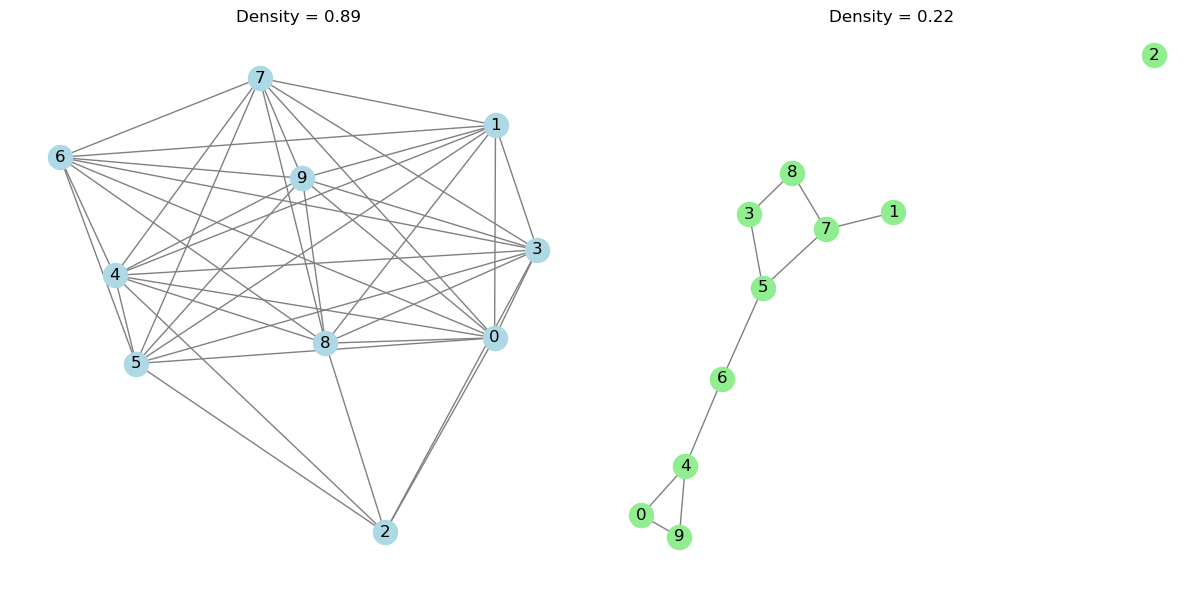

In [71]:
# È´òÂØÜÂ∫¶„Éç„ÉÉ„Éà„ÉØ„Éº„ÇØÔºà„Åª„ÅºÂÆåÂÖ®„Ç∞„É©„Éï„Å´Ëøë„ÅÑÔºâ
dense_graph = nx.dense_gnm_random_graph(n=10, m=40)  # „Éé„Éº„Éâ10ÂÄã„ÄÅ„Ç®„ÉÉ„Ç∏40Êú¨

# ‰ΩéÂØÜÂ∫¶„Éç„ÉÉ„Éà„ÉØ„Éº„ÇØÔºà„Çπ„Éë„Éº„Çπ„Å™ÊßãÈÄ†Ôºâ
sparse_graph = nx.gnm_random_graph(n=10, m=10)  # „Éé„Éº„Éâ10ÂÄã„ÄÅ„Ç®„ÉÉ„Ç∏10Êú¨

# Âõ≥„ÅÆÊèèÁîª
plt.figure(figsize=(12, 6))

# È´òÂØÜÂ∫¶„Éç„ÉÉ„Éà„ÉØ„Éº„ÇØ„ÅÆÊèèÁîª
plt.subplot(1, 2, 1)
nx.draw(dense_graph, with_labels=True, node_color='lightblue', edge_color='gray')
plt.title("Density = {:.2f}".format(nx.density(dense_graph)))

# ‰ΩéÂØÜÂ∫¶„Éç„ÉÉ„Éà„ÉØ„Éº„ÇØ„ÅÆÊèèÁîª
plt.subplot(1, 2, 2)
nx.draw(sparse_graph, with_labels=True, node_color='lightgreen', edge_color='gray')
plt.title("Density = {:.2f}".format(nx.density(sparse_graph)))

plt.tight_layout()
plt.show()

In [72]:
def graph_stats(G, name):
    n = G.number_of_nodes()
    m = G.number_of_edges()
    density = nx.density(G)
    print(f"{name}:")
    print(f"  „Éé„Éº„ÉâÊï∞: {n}")
    print(f"  „Ç®„ÉÉ„Ç∏Êï∞: {m}")
    print(f"  ÂØÜÂ∫¶: {density:.6f}\n")

graph_stats(G_pgrid, "power-us-grid")
graph_stats(G_arvix, "arvix")
graph_stats(G_fb, "facebook")
graph_stats(G_wiki, "wiki")
graph_stats(G_cora, "cora")

power-us-grid:
  „Éé„Éº„ÉâÊï∞: 4941
  „Ç®„ÉÉ„Ç∏Êï∞: 6594
  ÂØÜÂ∫¶: 0.000540

arvix:
  „Éé„Éº„ÉâÊï∞: 5242
  „Ç®„ÉÉ„Ç∏Êï∞: 14496
  ÂØÜÂ∫¶: 0.001055

facebook:
  „Éé„Éº„ÉâÊï∞: 4039
  „Ç®„ÉÉ„Ç∏Êï∞: 88234
  ÂØÜÂ∫¶: 0.010820

wiki:
  „Éé„Éº„ÉâÊï∞: 7115
  „Ç®„ÉÉ„Ç∏Êï∞: 100762
  ÂØÜÂ∫¶: 0.003981

cora:
  „Éé„Éº„ÉâÊï∞: 2485
  „Ç®„ÉÉ„Ç∏Êï∞: 5069
  ÂØÜÂ∫¶: 0.001642



# Ê¨°Êï∞


„ÅÇ„Çã„Éé„Éº„Éâ„ÅåÊé•Á∂ö„Åó„Å¶„ÅÑ„Çã„É™„É≥„ÇØÔºàËæ∫Ôºâ„ÅÆÊï∞„Çí**Ê¨°Êï∞**ÔºàdegreeÔºâ„Å®Âëº„Å≥„Åæ„Åô„ÄÇ



---

## **Âπ≥ÂùáÊ¨°Êï∞**

„Éç„ÉÉ„Éà„ÉØ„Éº„ÇØÂÖ®‰Ωì„Å´„Åä„Åë„Çã„Éé„Éº„Éâ„ÅÆÊ¨°Êï∞„ÅÆÂπ≥ÂùáÂÄ§„Çí**Âπ≥ÂùáÊ¨°Êï∞**„Å®„ÅÑ„ÅÑ„Åæ„ÅôÔºö

$$
\langle k \rangle \equiv \dfrac{1}{N} \sum_{i=1}^{N} k_i
$$

---

### **ÁÑ°Âêë„Ç∞„É©„Éï„ÅÆÂ†¥Âêà**

ÁÑ°Âêë„Éç„ÉÉ„Éà„ÉØ„Éº„ÇØ„Åß„ÅØ„ÄÅÂπ≥ÂùáÊ¨°Êï∞„ÅØÊ¨°„ÅÆ„Çà„ÅÜ„Å´Ë°®„Åï„Çå„Åæ„ÅôÔºö

$$
\langle k \rangle \equiv \dfrac{2E}{N}
$$

„Åì„Åì„Åß $E$ „ÅØ„Éç„ÉÉ„Éà„ÉØ„Éº„ÇØÂÜÖ„ÅÆ„É™„É≥„ÇØÔºàËæ∫Ôºâ„ÅÆÁ∑èÊï∞„Åß„Åô„ÄÇ

---

### **ÊúâÂêë„Ç∞„É©„Éï„ÅÆÂ†¥Âêà**

ÊúâÂêë„Éç„ÉÉ„Éà„ÉØ„Éº„ÇØ„Åß„ÅØ„ÄÅÂêÑ„Éé„Éº„Éâ„Å´„ÅØ**ÂÖ•Ê¨°Êï∞**„Å®**Âá∫Ê¨°Êï∞**„Åå„ÅÇ„Çä„Åæ„ÅôÔºö

- Âπ≥ÂùáÂÖ•Ê¨°Êï∞Ôºö

  $$
  \langle k^{\text{in}} \rangle \equiv \dfrac{1}{N} \sum_{i=1}^{N} k_i^{\text{in}} = \dfrac{E}{N}
  $$

- Âπ≥ÂùáÂá∫Ê¨°Êï∞Ôºö

  $$
  \langle k^{\text{out}} \rangle \equiv \dfrac{1}{N} \sum_{i=1}^{N} k_i^{\text{out}}
  $$

‚Äª ÊúâÂêë„Ç∞„É©„Éï„Åß„ÇÇ„É™„É≥„ÇØÊï∞ $E$ „Å´ÂØæ„Åó„ÄÅÂÖ•Ê¨°Êï∞„Å®Âá∫Ê¨°Êï∞„ÅÆÂêàË®à„ÅØÂêå„Åò„Å™„ÅÆ„ÅßÔºö

$$
\langle k \rangle \equiv \dfrac{E}{N}
$$

### „Éé„Éº„Éâ„ÅÆÊ¨°Êï∞ÂàÜÂ∏ÉÔºàNode degree distributionÔºâ

Ê¨°„ÅÆ„Çà„ÅÜ„Å´ÂÆöÁæ©„Åó„Åæ„ÅôÔºö

- $N_k$ÔºöÊ¨°Êï∞„Åå $k$ „Åß„ÅÇ„Çã„Éé„Éº„Éâ„ÅÆÊï∞  
- $P(k)$Ôºö„É©„É≥„ÉÄ„É†„Å´ÈÅ∏„Å∞„Çå„Åü„Éé„Éº„Éâ„ÅÆÊ¨°Êï∞„Åå $k$ „Åß„ÅÇ„ÇãÁ¢∫Áéá

> „Åì„ÅÆ„Å®„Åç„ÄÅÊ¨°Êï∞ÂàÜÂ∏É„ÅØÊ¨°„ÅÆ„Çà„ÅÜ„Å´Ë°®„Åï„Çå„Åæ„ÅôÔºö

$$
P(k) = \dfrac{N_k}{N}
$$

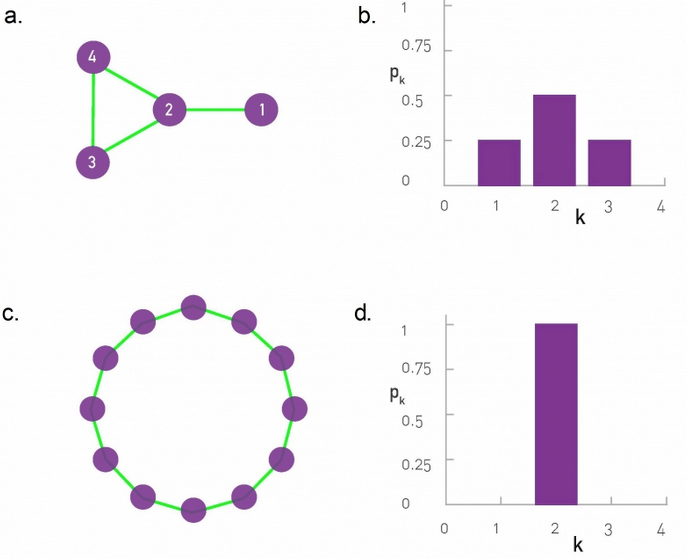


In [ ]:
def average_degree(G: nx.Graph) -> float:
    return sum(G.degree(n) for n in G.nodes) / len(G.nodes)

def average_in(G: nx.Graph) -> float:
    return sum(G.in_degree(n) for n in G.nodes) / len(G.nodes)

def average_out(G: nx.Graph) -> float:
    return sum(G.out_degree(n) for n in G.nodes) / len(G.nodes)

In [66]:
print(average_degree(G_pgrid))
print(average_degree(G_arvix))
print(average_degree(G_fb))
print(average_degree(G_wiki))
print(average_degree(G_cora))

2.66909532483303
5.530713468141931
43.69101262688784
28.32382290934645
4.0796780684104625


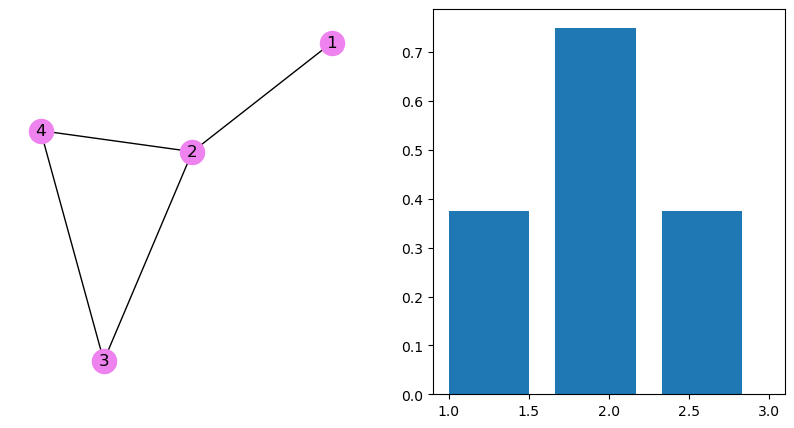

In [67]:
G = nx.cycle_graph(12)
G = nx.Graph([(1, 2), (2, 4), (2, 3), (3, 4)])


fig, axs = plt.subplots(1, 2, figsize=(10, 5))
# Plot graph
nx.draw_kamada_kawai(G, with_labels=True, node_color="violet", ax=axs[0])

# Plot hist
# plt.subplot(2, 2, 2)
axs[1].hist([G.degree(n) for n in G.nodes], density=True, bins=3, width=0.5)
plt.show()

<Figure size 2000x500 with 0 Axes>

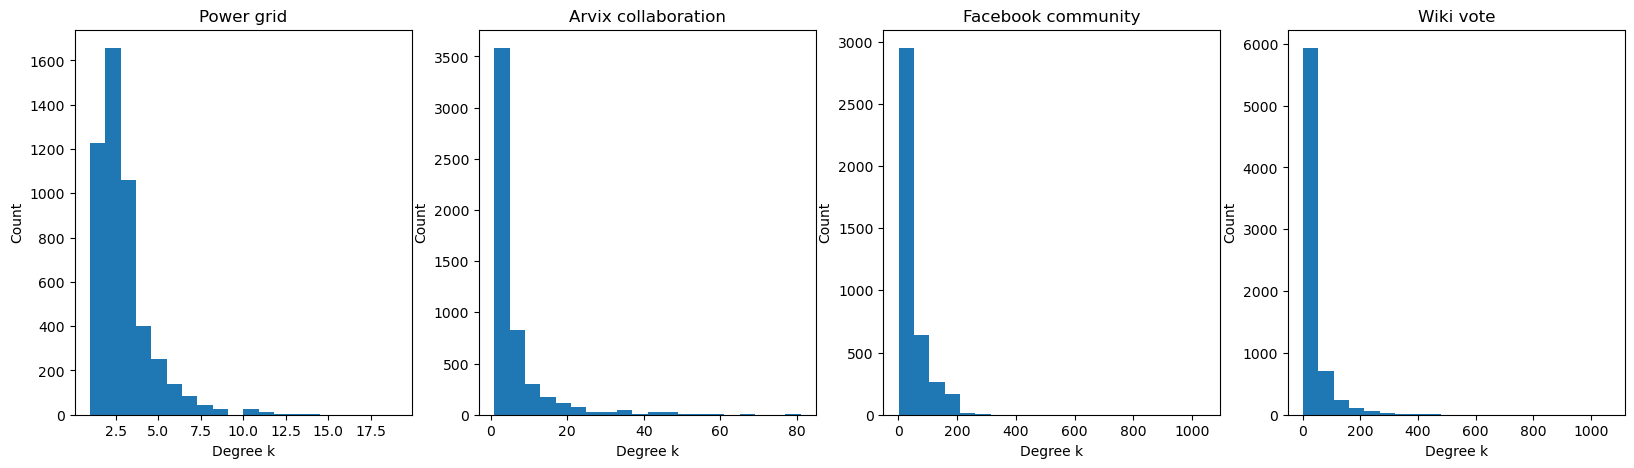

In [68]:
plt.figure(figsize=(4 * 5, 5))
real_graphs = [G_pgrid, G_arvix, G_fb, G_wiki]
titles = [
    "Power grid",
    "Arvix collaboration",
    "Facebook community",
    "Wiki vote",
]

fig, axs = plt.subplots(1, 4, figsize=(20, 5))
for i, (G, title) in enumerate(zip(real_graphs, titles)):
    axs[i].set_title(title)
    axs[i].hist([G.degree(u) for u in G.nodes], bins=20)
    axs[i].set_xlabel("Degree k")
    axs[i].set_ylabel("Count")

plt.show()

# ÁµåË∑ØÔºàPathÔºâ

- ÁµåË∑ØÔºàpathÔºâ„Å®„ÅØ„ÄÅ„Éé„Éº„Éâ„Å®„Éé„Éº„Éâ„Çí„Ç®„ÉÉ„Ç∏„ÇíÈÄö„Åò„Å¶„Åü„Å©„Çã„Éé„Éº„ÉâÂàó„ÅÆ„Åì„Å®„ÇíÊåá„Åô„ÄÇ
- ÁµåË∑Ø„Åå $(i_1, i_2, ..., i_k)$ „ÅÆ„Çà„ÅÜ„Å´ $k$ ÂÄã„ÅÆ„Éé„Éº„Éâ„ÇíÈÄöÈÅé„Åô„ÇãÂ†¥Âêà„ÄÅÈï∑„ÅïÔºàlengthÔºâ„ÅØ $k-1$„ÄÇ
- **ÂçòÁ¥îÁµåË∑ØÔºàsimple pathÔºâ**ÔºöÂêå„Åò„Éé„Éº„Éâ„Çí2Âõû‰ª•‰∏äÈÄö„Çâ„Å™„ÅÑÁµåË∑Ø

- ÊúÄÁü≠ÁµåË∑Ø„Å®„ÅØ„ÄÅ„ÅÇ„Çã„Éé„Éº„Éâ„Åã„ÇâÂà•„ÅÆ„Éé„Éº„Éâ„Å∏Âà∞ÈÅî„Åô„ÇãÁµåË∑Ø„ÅÆ‰∏≠„Åß„ÄÅ**ÈÄöÈÅé„Åô„Çã„É™„É≥„ÇØÔºà„Ç®„ÉÉ„Ç∏Ôºâ„ÅÆÊú¨Êï∞„ÅåÊúÄ„ÇÇÂ∞ë„Å™„ÅÑ„ÇÇ„ÅÆ**„ÇíÊåá„Åô„ÄÇ
    - „Éé„Éº„Éâ $i$ „Åã„Çâ„Éé„Éº„Éâ $j$ „Å∏„ÅÆÊúÄÁü≠ÁµåË∑Ø„ÅÆÈï∑„Åï„Çí $d(i, j)$ „Å®Ë°®„Åô
    - ÊúâÂêë„Éç„ÉÉ„Éà„ÉØ„Éº„ÇØ„Åß„ÅØ„Ç®„ÉÉ„Ç∏„ÅÆÂêë„Åç„ÇíËÄÉÊÖÆ„Åô„ÇãÂøÖË¶Å„Åå„ÅÇ„Çã


- **Âπ≥ÂùáÊúÄÁü≠ÁµåË∑ØÈï∑**ÔºàAverage Shortest Path LengthÔºâÔºö
  $$
  \langle d \rangle = \dfrac{1}{N(N - 1)} \sum_{i \neq j} d(i, j)
  $$
- **„Éç„ÉÉ„Éà„ÉØ„Éº„ÇØÁõ¥ÂæÑÔºàdiameterÔºâ**Ôºö
  ÂÖ®„Å¶„ÅÆ„Éé„Éº„ÉâÂØæ $(i, j)$ „Å´„Åä„Åë„ÇãÊúÄÁü≠Ë∑ùÈõ¢„ÅÆÊúÄÂ§ßÂÄ§Ôºö
  $$
  D = \max_{i, j} d(i, j)
  $$

ÊúÄÁü≠ÁµåË∑Ø (1 ‚Üí 6): [1, 5, 4, 6]
ÊúÄÁü≠Ë∑ùÈõ¢: 3
Âπ≥ÂùáÊúÄÁü≠ÁµåË∑ØÈï∑: 1.7333333333333334
„Éç„ÉÉ„Éà„ÉØ„Éº„ÇØ„ÅÆÁõ¥ÂæÑ: 3


/tmp/ipykernel_71422/1851937310.py:29: DeprecationWarning: `alltrue` is deprecated as of NumPy 1.25.0, and will be removed in NumPy 2.0. Please use `all` instead.
  nx.draw_networkx_edges(G, pos, edgelist=path_edges, edge_color='red', width=2)


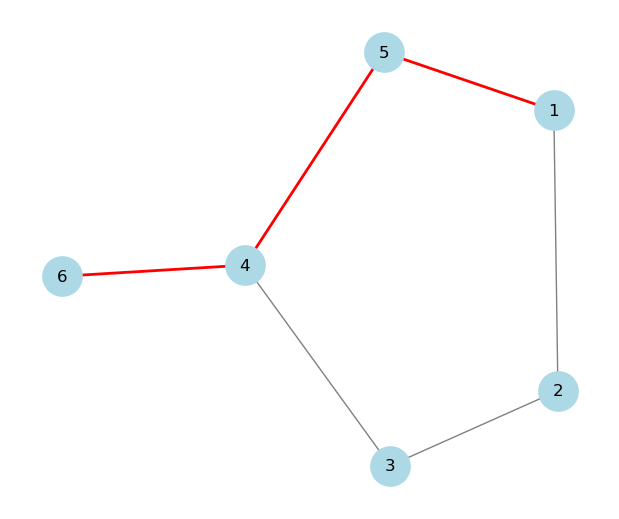

In [75]:
G = nx.Graph()
edges = [(1, 2), (2, 3), (3, 4), (1, 5), (5, 4), (4, 6)]
G.add_edges_from(edges)

# ÊúÄÁü≠ÁµåË∑ØÔºà‰æãÔºö„Éé„Éº„Éâ1 ‚Üí „Éé„Éº„Éâ6Ôºâ
shortest_path = nx.shortest_path(G, source=1, target=6)
shortest_length = nx.shortest_path_length(G, source=1, target=6)

# Âπ≥ÂùáÊúÄÁü≠ÁµåË∑ØÈï∑ÔºàÂÖ®„Éé„Éº„ÉâÈñìÔºâ
avg_shortest_path = nx.average_shortest_path_length(G)

# „Éç„ÉÉ„Éà„ÉØ„Éº„ÇØ„ÅÆÁõ¥ÂæÑ
diameter = nx.diameter(G)

# ÁµêÊûú„ÅÆÂá∫Âäõ
print("ÊúÄÁü≠ÁµåË∑Ø (1 ‚Üí 6):", shortest_path)
print("ÊúÄÁü≠Ë∑ùÈõ¢:", shortest_length)
print("Âπ≥ÂùáÊúÄÁü≠ÁµåË∑ØÈï∑:", avg_shortest_path)
print("„Éç„ÉÉ„Éà„ÉØ„Éº„ÇØ„ÅÆÁõ¥ÂæÑ:", diameter)

# „Éç„ÉÉ„Éà„ÉØ„Éº„ÇØ„ÅÆÊèèÁîª
plt.figure(figsize=(6, 5))
pos = nx.spring_layout(G, seed=42)

# ÊúÄÁü≠ÁµåË∑Ø„ÇíËµ§„ÅßÂº∑Ë™ø
path_edges = list(zip(shortest_path[:-1], shortest_path[1:]))

nx.draw(G, pos, with_labels=True, node_color='lightblue', edge_color='gray', node_size=800)
nx.draw_networkx_edges(G, pos, edgelist=path_edges, edge_color='red', width=2)

plt.show()

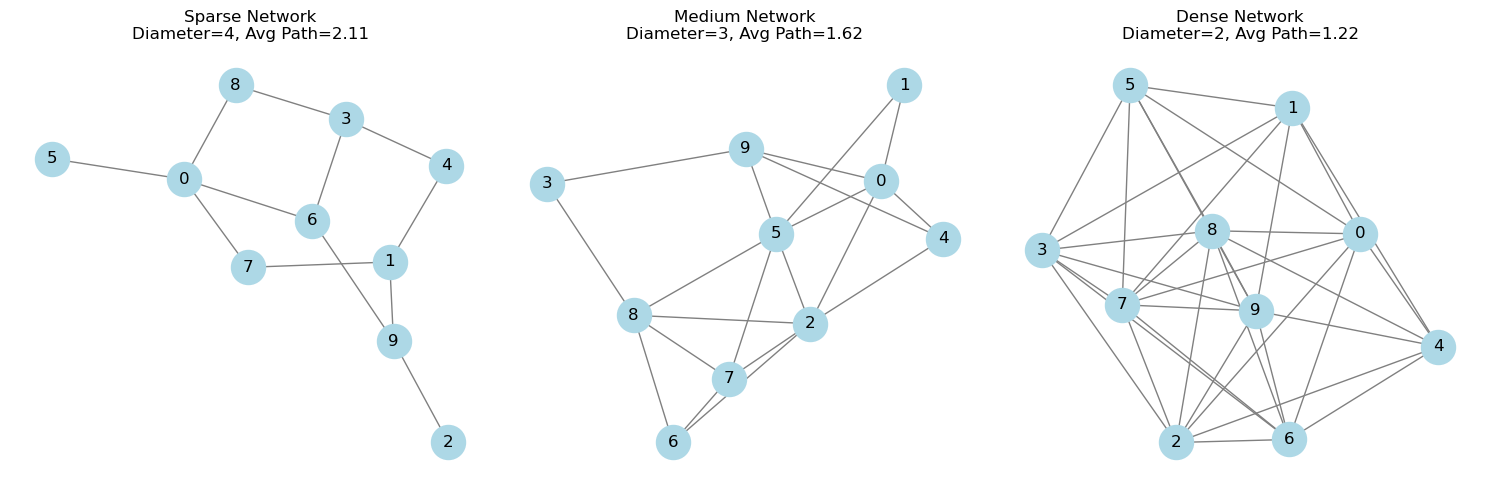

In [77]:
graphs = {}

graphs["Sparse"] = nx.gnm_random_graph(n=10, m=12, seed=1)

graphs["Medium"] = nx.gnm_random_graph(n=10, m=20, seed=2)

graphs["Dense"] = nx.gnm_random_graph(n=10, m=35, seed=3)

results = []

plt.figure(figsize=(15, 5))
for i, (name, G) in enumerate(graphs.items(), start=1):
    if not nx.is_connected(G):
        G = G.subgraph(max(nx.connected_components(G), key=len)).copy()

    avg_path_length = nx.average_shortest_path_length(G)
    diameter = nx.diameter(G)
    
    results.append({
        "Type": name,
        "Nodes": G.number_of_nodes(),
        "Edges": G.number_of_edges(),
        "Avg Shortest Path": round(avg_path_length, 3),
        "Diameter": diameter
    })

    plt.subplot(1, 3, i)
    pos = nx.spring_layout(G, seed=42)
    nx.draw(G, pos, with_labels=True, node_color='lightblue', edge_color='gray', node_size=600)
    plt.title(f"{name} Network\nDiameter={diameter}, Avg Path={avg_path_length:.2f}")

plt.tight_layout()
plt.show()

# ÈÄ£ÁµêÊÄßÔºàConnectednessÔºâ

**ÈÄ£ÁµêÊÄß**„Å®„ÅØ„ÄÅ„Éç„ÉÉ„Éà„ÉØ„Éº„ÇØÂÜÖ„ÅÆ„Éé„Éº„ÉâÂêåÂ£´„Åå**„Å©„Çå„Å†„Åë„Å§„Å™„Åå„Å£„Å¶„ÅÑ„Çã„Åã**„ÄÅ„Å§„Åæ„Çä**‰∏ÄÊñπ„ÅÆ„Éé„Éº„Éâ„Åã„Çâ‰ªñÊñπ„ÅÆ„Éé„Éº„Éâ„Å∏Âà∞ÈÅîÂèØËÉΩ„Åã„Å©„ÅÜ„Åã**„ÇíÁ§∫„ÅôÊ¶ÇÂøµ„Åß„ÅÇ„Çã„ÄÇ

- **ÈÄ£Áµê„Ç∞„É©„ÉïÔºàconnected graphÔºâ**Ôºö
  - ‰ªªÊÑè„ÅÆ„Éé„Éº„ÉâÂØæ $(i, j)$ „Å´ÂØæ„Åó„Å¶„ÄÅ$i$ „Åã„Çâ $j$ „Åæ„Åß„ÅÆ„Éë„ÇπÔºàÁµåË∑ØÔºâ„ÅåÂ≠òÂú®„Åô„Çã„ÄÇ
- **ÈùûÈÄ£Áµê„Ç∞„É©„ÉïÔºàdisconnected graphÔºâ**Ôºö
  - „Éé„Éº„Éâ„ÅÆ‰∏ÄÈÉ®„Åå‰ªñ„Å®Âàá„ÇäÈõ¢„Åï„Çå„Å¶„ÅÑ„Å¶„ÄÅ„Åô„Åπ„Å¶„ÅÆ„Éé„Éº„ÉâÈñì„Å´„Éë„Çπ„ÅåÂ≠òÂú®„Åó„Å™„ÅÑ„ÄÇ


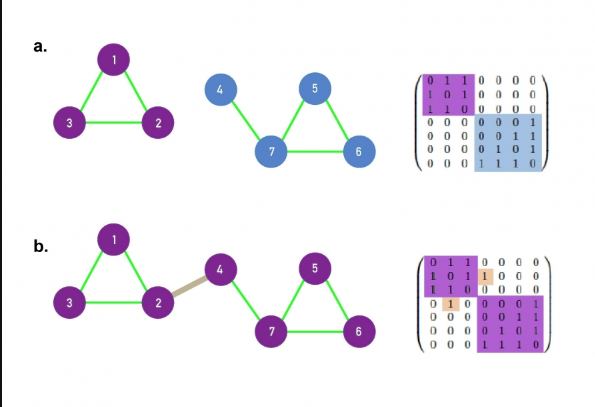


- **ÈÄ£ÁµêÊàêÂàÜ**„Å®„ÅØ„ÄÅ„Éç„ÉÉ„Éà„ÉØ„Éº„ÇØÂÜÖ„Åß**‰∫í„ÅÑ„Å´Âà∞ÈÅîÂèØËÉΩ„Å™„Éé„Éº„Éâ„ÅÆÈõÜÂêà**„ÄÇ
    - ÁÑ°Âêë„Ç∞„É©„Éï„Åß„ÅØ„ÄÅ‰ªªÊÑè„ÅÆ„Éé„Éº„ÉâÂØæ $(i, j)$ „Å´ÂØæ„Åó„Å¶„Éë„Çπ„ÅåÂ≠òÂú®„Åô„Çå„Å∞„ÄÅÂêå‰∏Ä„ÅÆÊàêÂàÜ„ÄÇ
    - ÊúâÂêë„Ç∞„É©„Éï„Åß„ÅØ„ÄÅ‰ª•‰∏ã„ÅÆ2Á®ÆÈ°û„ÅÆÊàêÂàÜ„ÇíÂå∫Âà•Ôºö
        - **Âº∑ÈÄ£ÁµêÊàêÂàÜÔºàStrongly Connected ComponentÔºâ**
        - **Âº±ÈÄ£ÁµêÊàêÂàÜÔºàWeakly Connected ComponentÔºâ**

![Graph 4](https://koseki2580.github.io/study-docs/assets/images/graph-4.drawio-a7530706b59bdb922f19b1aa4ef19799.svg)


---

- **Âº∑ÈÄ£ÁµêÔºàStrongly ConnectedÔºâ**  
  ‰ªªÊÑè„ÅÆ„Éé„Éº„ÉâÂØæ $(i, j)$ „Å´ÂØæ„Åó„Å¶„ÄÅ  
  - „Éé„Éº„Éâ $i$ „Åã„Çâ„Éé„Éº„Éâ $j$ „Å∏Âà∞ÈÅî„Åô„Çã„Éë„Çπ„ÅåÂ≠òÂú®„Åó„ÄÅÂêåÊôÇ„Å´„Éé„Éº„Éâ $j$ „Åã„Çâ„Éé„Éº„Éâ $i$ „Å∏„ÇÇÂà∞ÈÅî„Åß„Åç„ÇãÂ†¥Âêà„ÄÅ„Åù„ÅÆ„Éç„ÉÉ„Éà„ÉØ„Éº„ÇØÔºà„Åæ„Åü„ÅØÊàêÂàÜÔºâ„ÅØ **Âº∑ÈÄ£Áµê** „Å®Âëº„Å∞„Çå„Åæ„Åô„ÄÇ


---

- **Âº±ÈÄ£ÁµêÔºàWeakly ConnectedÔºâ**  
  - ‰∏ÄÊñπÂêë„Åó„Åã„Éë„Çπ„ÅåÂ≠òÂú®„Åó„Å™„ÅÑ„Éé„Éº„ÉâÂØæ„Åå„ÅÇ„ÇãÂ†¥Âêà„ÄÅ„Åù„ÅÆ„Éç„ÉÉ„Éà„ÉØ„Éº„ÇØ„ÅØ **Âº±ÈÄ£Áµê** „Åß„Åô„ÄÇ


---

![Graph 4](https://miro.medium.com/v2/resize:fit:1400/1*2DtMg3xU5G_2Bvw8-hAxaQ.jpeg)


# „ÇØ„É©„Çπ„Çø„É™„É≥„Ç∞‰øÇÊï∞ÔºàClustering CoefficientÔºâ

„ÇØ„É©„Çπ„Çø„É™„É≥„Ç∞‰øÇÊï∞„ÅØ„ÄÅ„Éé„Éº„Éâ„ÅåÂØÜÈõÜ„Åô„ÇãÂÇæÂêë„Åå„ÅÇ„Çä„Åæ„Åô„ÄÇÁ∞°Âçò„Å´Ë®Ä„Åà„Å∞„ÄÅ„Éé„Éº„Éâ„ÅÆËøëÈö£„Éé„Éº„Éâ„Åå‰∫í„ÅÑ„Å´„Å©„ÅÆÁ®ãÂ∫¶„Å§„Å™„Åå„Å£„Å¶„ÅÑ„Çã„Åã„ÇíÊ∏¨ÂÆö„Åô„Çã„ÄÇ
- „ÇØ„É©„Çπ„Çø„É™„É≥„Ç∞‰øÇÊï∞„ÅåÈ´ò„ÅÑÂ†¥Âêà„ÄÅ„Éé„Éº„Éâ„ÅÆËøëÈö£„Éé„Éº„Éâ„ÇÇ‰∫í„ÅÑ„Å´„Å§„Å™„Åå„Å£„Å¶„Åä„Çä„ÄÅÁ∑äÂØÜ„Å™„Ç≥„Éü„É•„Éã„ÉÜ„Ç£„ÇíÂΩ¢Êàê„Åó„Å¶„ÅÑ„Çã„Åì„Å®„ÇíÁ§∫„Åô„ÄÇÈÄÜ„Å´„ÄÅ„ÇØ„É©„Çπ„Çø„É™„É≥„Ç∞‰øÇÊï∞„Åå‰Ωé„ÅÑÂ†¥Âêà„ÄÅËøëÈö£„Éé„Éº„Éâ„ÅÆ„Å§„Å™„Åå„Çä„ÅåÁ∑©„Åè„ÄÅ„Éç„ÉÉ„Éà„ÉØ„Éº„ÇØÂÜÖ„ÅÆÊßãÈÄ†„Åå„Çà„Çä„É©„É≥„ÉÄ„É†„Åß„ÅÇ„Çã„Åì„Å®„ÇíÁ§∫„Åó„Å¶„ÅÑ„ÇãÂèØËÉΩÊÄß„Åå„ÅÇ„Çã

$$
C_i = \dfrac{
\text{„Éé„Éº„Éâ } i \text{ „ÅÆËøëÈö£ÂêåÂ£´„ÅÆÂÆüÈöõ„ÅÆÊé•Á∂öÊï∞}
}{
\text{ÂèØËÉΩ„Å™ÊúÄÂ§ßÊé•Á∂öÊï∞}
}
= \dfrac{2E_i}{k_i(k_i - 1)}
$$

- $E_i$Ôºö„Éé„Éº„Éâ $i$ „ÅÆËøëÈö£„Éé„Éº„ÉâÈñì„Å´Â≠òÂú®„Åô„Çã**„É™„É≥„ÇØ„ÅÆÊï∞**
- $k_i$Ôºö„Éé„Éº„Éâ $i$ „ÅÆÊ¨°Êï∞ÔºàÈö£Êé•„Éé„Éº„ÉâÊï∞Ôºâ
- ÂàÜÊØç $k_i(k_i - 1)/2$ „ÅØ„ÄÅËøëÈö£„Éé„Éº„ÉâÈñì„Å´Âºµ„Çã„Åì„Å®„Åå„Åß„Åç„ÇãÊúÄÂ§ß„ÅÆ„Ç®„ÉÉ„Ç∏Êï∞
- ÂÄ§„ÅÆÁØÑÂõ≤„ÅØ $C_i \in [0, 1]$

In [85]:
def clustering_coef(G: nx.Graph, u: int):
    """
    Return the clustering coefficient of node `u` from graph `G`

    Parameters:
    -----------
    G: nx.Graph
        Input graph
    u: int
        Node to calculate the clustering coefficient of.

    Returns:
    --------
    clustering coeff: int

    """
    ei = 0
    for i in G.neighbors(u):  # For each neighbour `i` of `u`
        for j in G.neighbors(u):  # For each neighbour `j` of `u`
            if i != j:  # no self loops
                ei += G.has_edge(i, j)  # Check if it has edge and add it to the total edges
    return ei / (G.degree(u) * (G.degree(u) - 1))  # divide by 2 because we count the edges twice

<Figure size 1500x700 with 0 Axes>

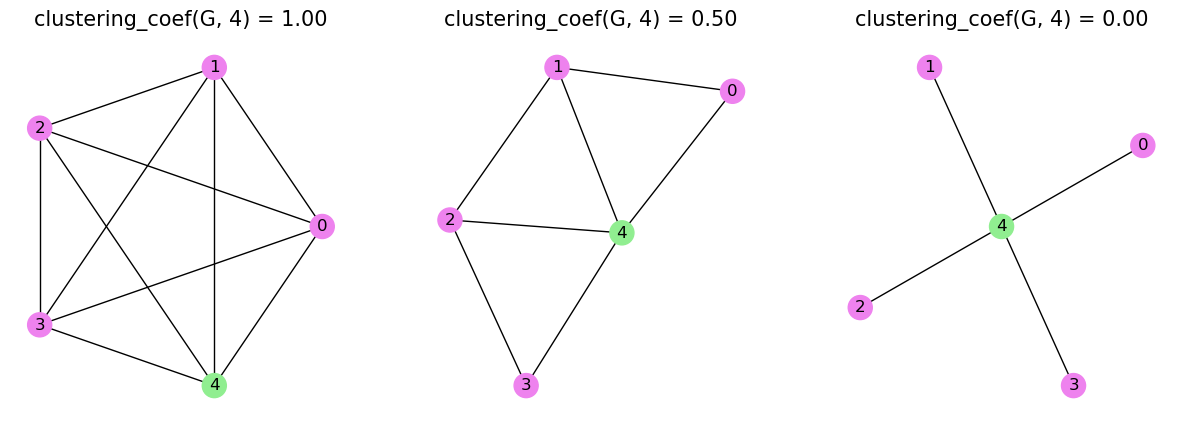

In [86]:
plt.figure(figsize=(15, 7))

G1 = nx.complete_graph(5)
G2 = nx.Graph([(0, 1), (0, 4), (1, 2), (1, 4), (2, 3), (2, 4), (3, 4)])
G3 = nx.Graph([(0, 4), (1, 4), (2, 4), (3, 4)])
graphs = [G1, G2, G3]

fig, axs = plt.subplots(1, 3, figsize=(15, 5))
for i, G in enumerate(graphs):
    node_color = ["violet" if u != 4 else "lightgreen" for u in G.nodes]
    axs[i].set_title(f"{clustering_coef(G, 4) = :.2f}", size=15)
    nx.draw_kamada_kawai(G, with_labels=True, node_color=node_color, ax=axs[i])

- **Âπ≥Âùá„ÇØ„É©„Çπ„Çø„É™„É≥„Ç∞‰øÇÊï∞**Ôºö

  $$
  C = \dfrac{1}{N} \sum_{i=1}^{N} C_i
  $$

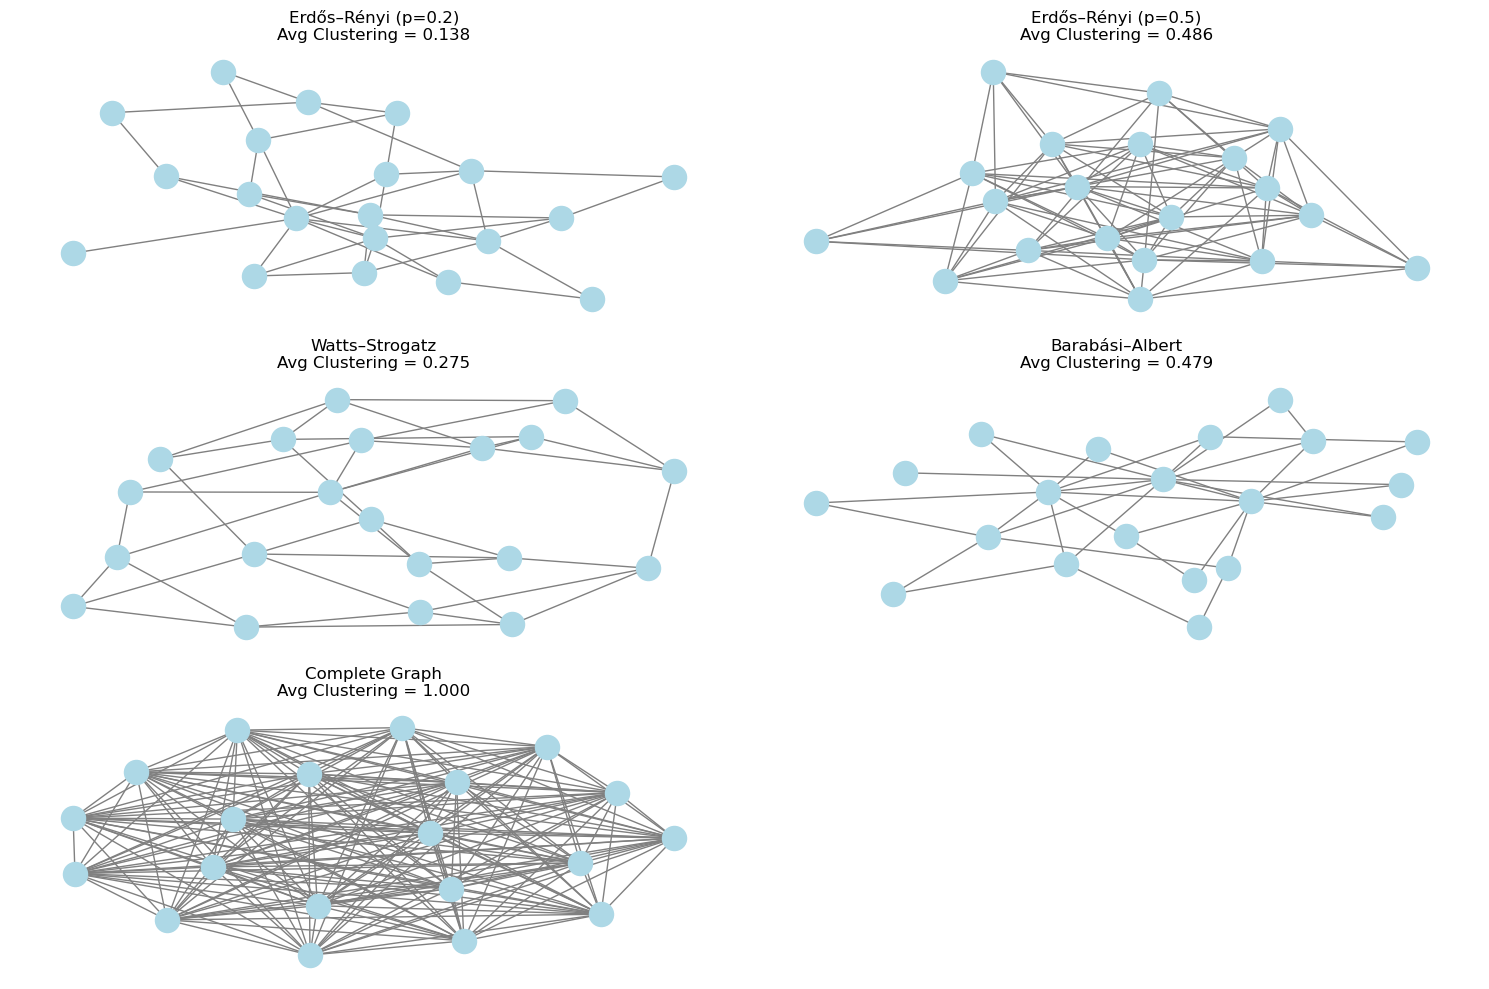

In [88]:
# „Éç„ÉÉ„Éà„ÉØ„Éº„ÇØ„ÅÆÁ®ÆÈ°û„ÇíÂÆöÁæ©
graphs = {
    "Erd≈ës‚ÄìR√©nyi (p=0.2)": nx.erdos_renyi_graph(n=20, p=0.2, seed=1),
    "Erd≈ës‚ÄìR√©nyi (p=0.5)": nx.erdos_renyi_graph(n=20, p=0.5, seed=2),
    "Watts‚ÄìStrogatz": nx.watts_strogatz_graph(n=20, k=4, p=0.3, seed=3),
    "Barab√°si‚ÄìAlbert": nx.barabasi_albert_graph(n=20, m=2, seed=4),
    "Complete Graph": nx.complete_graph(20)
}

# „ÇØ„É©„Çπ„Çø„É™„É≥„Ç∞‰øÇÊï∞„ÅÆÈõÜË®à
results = []
plt.figure(figsize=(15, 10))

for i, (name, G) in enumerate(graphs.items(), start=1):
    clustering = nx.average_clustering(G)
    results.append((name, clustering))

    # „Éç„ÉÉ„Éà„ÉØ„Éº„ÇØ„ÅÆÊèèÁîª
    plt.subplot(3, 2, i)
    pos = nx.spring_layout(G, seed=42)
    nx.draw(G, pos, with_labels=False, node_color='lightblue', edge_color='gray', node_size=300)
    plt.title(f"{name}\nAvg Clustering = {clustering:.3f}")

plt.tight_layout()
plt.show()



# ‰∏≠ÂøÉÊÄßÔºàCentralitiesÔºâ

„Éç„ÉÉ„Éà„ÉØ„Éº„ÇØ„ÇíÊßãÊàê„Åô„ÇãÂêÑ„Éé„Éº„Éâ„Åå„Åù„ÅÆ„Éç„ÉÉ„Éà„ÉØ„Éº„ÇØ„ÅÆ‰∏≠„Åß„Å©„Çå„Åè„Çâ„ÅÑÈáçË¶Å„Åß„ÅÇ„Çã„Åã„ÇíÁ§∫„ÅôÊåáÊ®ô„Åß„ÅÇ„Çã

<video width="640" height="360" controls>
  <source src="https://cambridge-intelligence.com/wp-content/uploads/2023/08/social-network-analysis-degree-centrality.mp4" type="video/mp4">
  Your browser does not support the video tag.
</video>

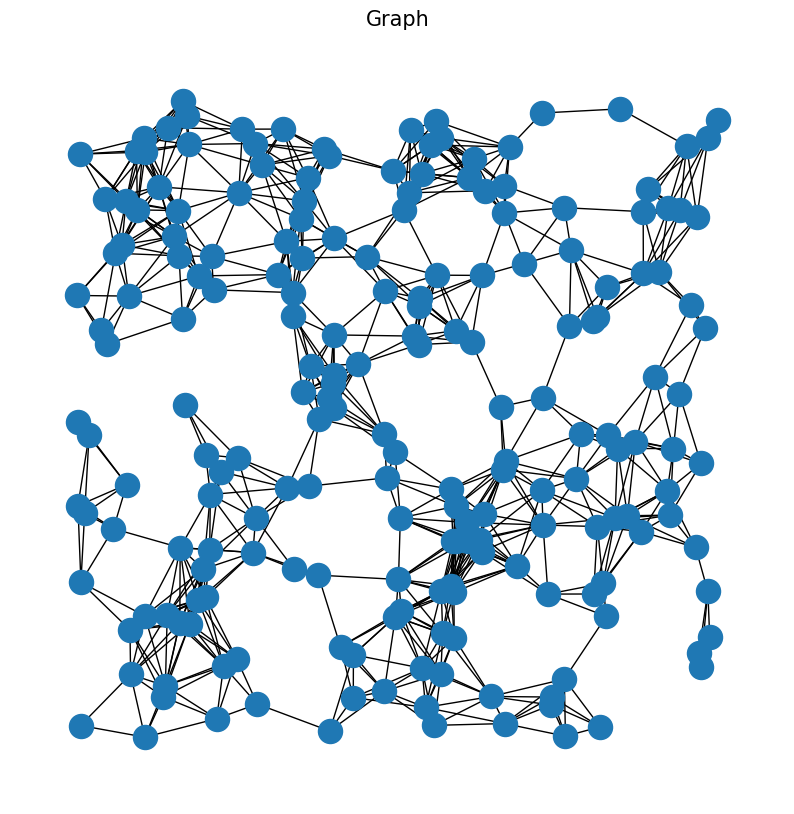

In [89]:
G = nx.random_geometric_graph(n=200, radius=0.125, seed=896803)  # 896803
pos = nx.get_node_attributes(G=G, name="pos")
plt.figure(figsize=(10, 10))
plt.title("Graph", size=15)
nx.draw(G, pos=pos)

## Ê¨°Êï∞‰∏≠ÂøÉÊÄßÔºàDegree CentralityÔºâ

- „Éé„Éº„Éâ„ÅåÁõ¥Êé•„Å§„Å™„Åå„Å£„Å¶„ÅÑ„Çã„É™„É≥„ÇØÔºà„Ç®„ÉÉ„Ç∏Ôºâ„ÅÆÊï∞„ÇíÂÖÉ„Å´„ÄÅ‰∏≠ÂøÉÊÄß„ÇíÂÆöÁæ©„ÄÇ
    - Â§ö„Åè„ÅÆ„Éé„Éº„Éâ„Å®„Å§„Å™„Åå„Å£„Å¶„ÅÑ„ÇãÔºùÂΩ±ÈüøÂäõ„ÅåÂ§ß„Åç„ÅÑ


$$
C_D(i) = \dfrac{\deg(i)}{N - 1}
$$

- $\deg(i)$Ôºö„Éé„Éº„Éâ $i$ „ÅÆÊ¨°Êï∞ÔºàÈö£Êé•„Éé„Éº„ÉâÊï∞Ôºâ
- $N$Ôºö„Éç„ÉÉ„Éà„ÉØ„Éº„ÇØ„ÅÆ„Éé„Éº„ÉâÁ∑èÊï∞

In [90]:
deg_colors = list(G.degree(n) for n in G.nodes)

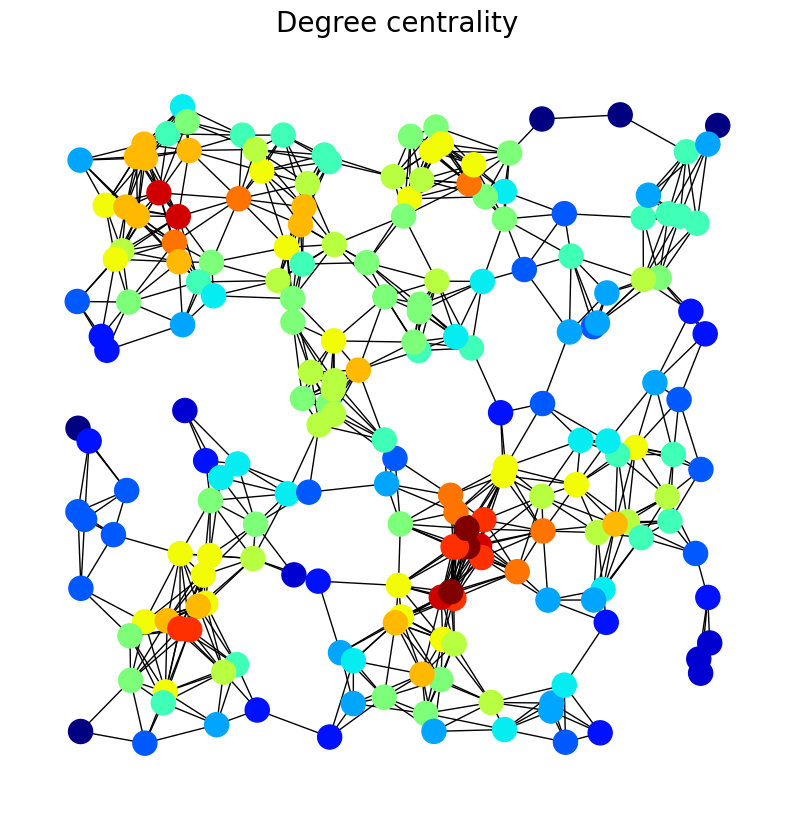

In [91]:
deg_colors = list(G.degree(n) for n in G.nodes)

plt.figure(figsize=(10, 10))
plt.title("Degree centrality", size=20)
nx.draw(G, pos=pos, node_color=deg_colors, cmap=plt.cm.jet)

## Â™í‰ªã‰∏≠ÂøÉÊÄßÔºàBetweenness CentralityÔºâ

- „Éé„Éº„Éâ„Åå**‰ªñ„ÅÆ„Éé„Éº„ÉâÂØæ„ÅÆÊúÄÁü≠ÁµåË∑Ø„ÅÆ‰∏≠ÈñìÁÇπ**„Å´„Å©„Çå„Å†„ÅëÁèæ„Çå„Çã„Åã„ÇíÊ∏¨„Çã„ÄÇ
    - „ÄåÊÉÖÂ†±„ÅÆÊ©ãÊ∏°„ÅóÂΩπ„Äç„Äå„Éç„ÉÉ„Éà„ÉØ„Éº„ÇØ„ÅÆÊµÅ„Çå„ÇíÂà∂Âæ°„Åô„Çã„Éé„Éº„Éâ„Äç

#### Êï∞ÂºèÔºö
$$
C_B(i) = \sum_{s \neq i \neq t} \dfrac{\sigma_{st}(i)}{\sigma_{st}}
$$

- $\sigma_{st}$Ôºö„Éé„Éº„Éâ $s$ „Åã„Çâ $t$ „Å∏„ÅÆÊúÄÁü≠ÁµåË∑Ø„ÅÆÊï∞  
- $\sigma_{st}(i)$Ôºö„Åù„ÅÆ„ÅÜ„Å°„Éé„Éº„Éâ $i$ „ÇíÈÄö„ÇãÁµåË∑Ø„ÅÆÊï∞


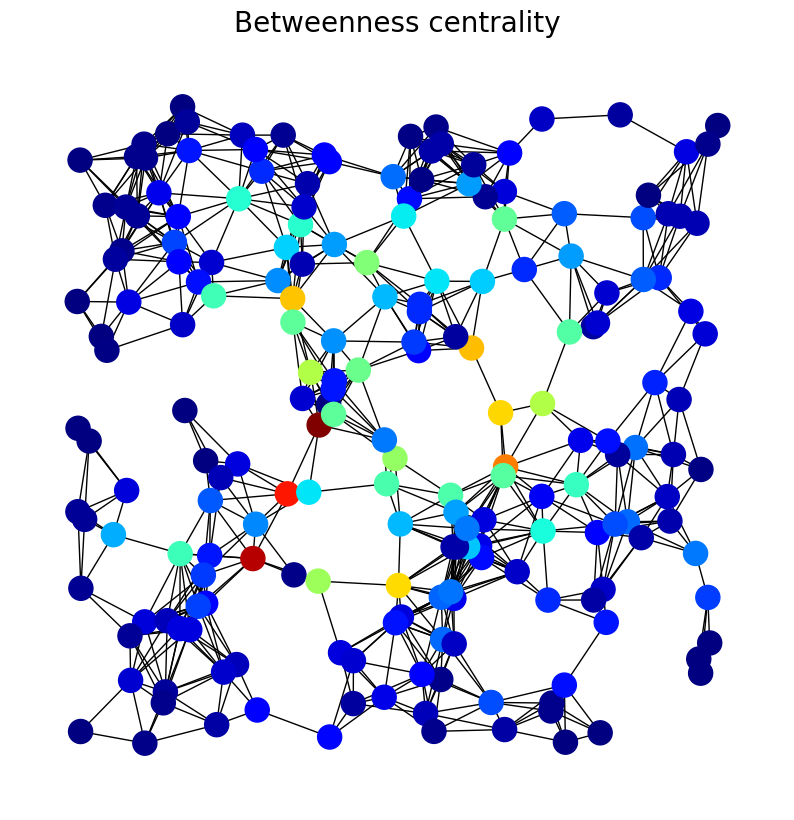

In [42]:
btw_colors = list(nx.betweenness_centrality(G).values())

plt.figure(figsize=(10, 10))
plt.title("Betweenness centrality", size=20)
nx.draw(G, pos=pos, node_color=btw_colors, cmap=plt.cm.jet)

## ËøëÊé•‰∏≠ÂøÉÊÄßÔºàCloseness CentralityÔºâ

- „Éé„Éº„Éâ $i$ „Åã„Çâ**‰ªñ„ÅÆ„Åô„Åπ„Å¶„ÅÆ„Éé„Éº„Éâ„Åæ„Åß„ÅÆË∑ùÈõ¢„ÅÆÈÄÜÊï∞„ÅÆÂêàË®à**„ÄÇ
    - ‰ªñ„Éé„Éº„Éâ„Å´„ÄåÁ¥†Êó©„ÅèÂà∞ÈÅî„Åß„Åç„Çã„Äç‰∏≠ÂøÉÁöÑ„Éé„Éº„Éâ„ÄÇ

#### Êï∞ÂºèÔºö
$$
C_C(i) = \dfrac{N - 1}{\sum_{j \neq i} d(i, j)}
$$

- $d(i, j)$Ôºö„Éé„Éº„Éâ $i$ „Å® $j$ „ÅÆÈñì„ÅÆÊúÄÁü≠Ë∑ùÈõ¢


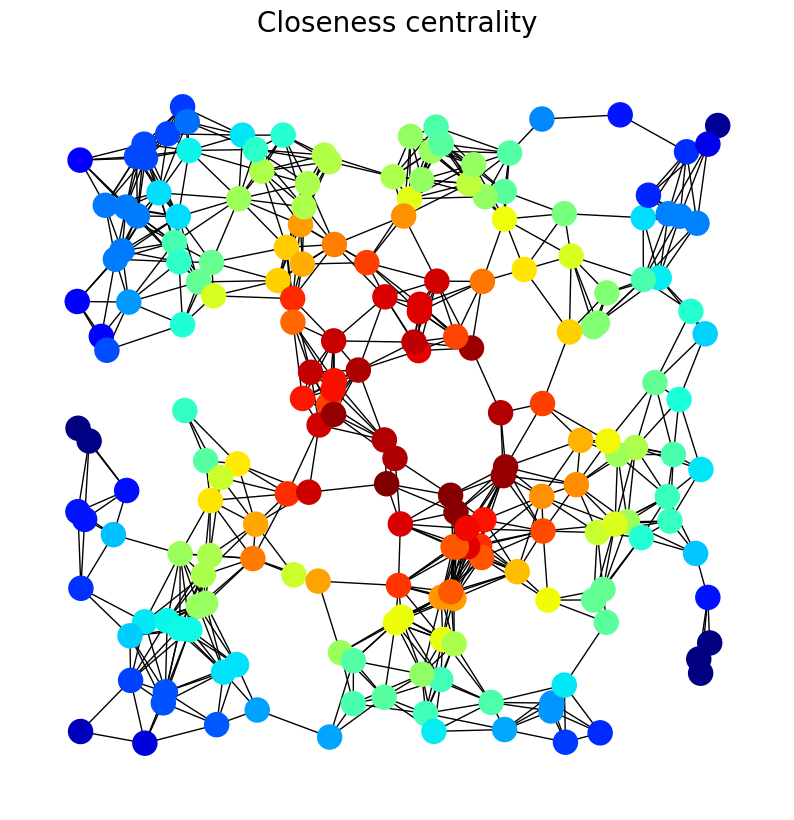

In [43]:
btw_colors = list(nx.closeness_centrality(G).values())

plt.figure(figsize=(10, 10))
plt.title("Closeness centrality", size=20)
nx.draw(G, pos=pos, node_color=btw_colors, cmap=plt.cm.jet)